Author: Lejia Zhang 1716780

# 1. Introduction

The problem discussed in INT305 is about sentiment analysis (SA) on the movie review data gathered from IMDB website. As the branch of natural language processing (NLP), now SA is widely used in analysis of humans’ responses in the areas such as product feedbacks, which has brought a lot of benefits in business and decision making. [1] 

The motivation of this project was to know the process and disciplines used in sentiment analysis on polarity classification and compare the performance of two algorithms—Support Vector Machine (SVM) and Logistic Regression (LR). The input to our classifier is movie review text with positive and negative label. After the data preprocessing and text tokenization, we then used supervised learning with hyperparameter tunning and model optimization to output a predicted classification rate on the test set. The final results of two algorithms was compared in multiple matrices shown in Section 5: Experiments and Results. 

The original dataset used in this project is available on: https://ai.stanford.edu/~amaas/data/sentiment/. 

In practical model training, I used the dataset with the same text resource but better used for model training. It could be downloaded from here:https://github.com/TheClub4/IMDB_Sentiment_Analysis/blob/master/movie_data.csv.

# 2. Related Work

The related work about this project could be categories into 4 categories. They are: Sentiment Analysis Overview, Sentiment Analysis using Support Vector Machine, Sentiment Analysis using Logistic Regression and Sentiment Analysis using Other Techniques. 

**2.1 Sentiment Analysis Review**

**Paper: Sentiment Analysis Algorithms and Applications: A survey**

This paper is the overview of sentiment analysis. According to the data shown in the paper, compared with the lexicon-based research on text, machine learning method has been more popular in recent years. Those approaches used for machine learning mainly belong to supervised learning and unsupervised learning. Among those algorithms, Na?ve Bayes and Support Vector Machine were the most widely used. 

Due to its business value and sentiment value, review contents were as the major resources of analysis and the benchmark of sentiment analysis, which is also the resource type of this INT305 project.

The process of sentiment analysis with machine learning includes the Sentiment Identification, Feature Selection and Sentiment Classification. This paper introduced one important feature selection method called Bag of Words (BOWs) which was also adopted in INT305 project. It transferred the context into word vectors and remove stop-words and do stemming (extracts the stem of the word). Because of its simplicity of classification process, it is most frequently used in feature selection.



**2.2 Sentiment Analysis using Support Vector Machine**

**Paper: Thumbs up? Sentiment Classification using Machine Learning Technique**

This paper provided me with the original dataset used for this project which is also about movie reviews. Due to the small size of dataset and its old dates of composition, it was replaced by the current dataset. 

This paper also inspired me to do sentiment analysis using Support Vector Machine algorithm and gave me the idea of experiment design. 

The project was designed to polarity classification on the movie reviews. There were 3 supervised algorithms were compared: Na?ve Bayes, Maximum Entropy Classification and Support Vector Machines. According to the performance evaluated 3-fold cross-validation accuracies, Support Vector Machine performed the best although its accuracy score was not high. It also compared the impact of the words’ frequency and presence. According to the result, feature presence was meaningful for sentiment analysis, however, the feature frequency has only marginal influence.

The evaluation method of this project could be further improved. In this project, only accuracy metric was used to evaluate the performance of models, which may only provide limited view of models’ abilities on classification. 

**2.3 Sentiment Analysis using Logistic Regression**

**Paper: Sentiment Analysis Using Multinomial Logistic Regression**

This paper showed the competitive performance of Logistic Regression on the classification. It offered me with the idea of data preprocessing and experiment design. 


This project analyzed the social media contents extracted from Tweet. When did feature selection, the words in tweet was firstly transferred into feature vector, then transformed into TF-IDF vector which could count the importance of word to the whole text. This INT305 project also use TF-IDF vectorization. According to this paper, Logistic Regression is competitive in CPU and memory consumption, thus it would be useful in the sentiment analysis which requires to process large amounts of data. In the experiments, confusion matrixes, accuracy, recall and precision were used as evaluation criteria. This project also adopts k-Fold cross validation and tries several folds to assess the model, which was also used in my project. One shortcoming of this project was that it didn’t tried different hyper-parameter settings on its models. 

**2.4 Sentiment Analysis using Other Techniques**

**Paper: Learning Word Vectors for Sentiment Analysis**

This paper provided me with the dataset used for my project. Compared with my project, it adopts the more advanced approaches which combined unsupervised and supervised learning methods. Similar to mine, vector-based model was used to assess continuous similarities between words. However, the model used in this project could not only captured nuanced sentiment information using supervised learning, it also catches semantic contents using unsupervised learning, which made it worked better on classification. 

My original idea for this INTE305 project was to design a similar model using mix techniques. While due to my limited knowledge in machine learning, I abandoned this method and chose to do algorithm comparisons on Support Vector Machine and Logistic Regression. 


# 3. Problem Formulation

The dataset used in this project was movie review dataset generated by Stanford University in 2011. The data source was the reviews of the movies provided by IMDB. Based on the star rating that user gave on the movie, those movie reviews were divided into two groups: positive (less than 4 stars of 10 stars) and negative (over 7 stars of 10 stars). In this dataset, there were 25,000 positive reviews and negative reviews. 

In [1]:
import os
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn import metrics

In [2]:
os.chdir("/content/drive/MyDrive")
df = pd.read_csv('/content/drive/MyDrive/movie_data.csv')

In [ ]:
# sum of positive reviews
sum(df["sentiment"] == 0)

25000

In [ ]:
# sum of negative reviews
sum(df["sentiment"] == 1)

25000

They were shown in text method with sentiment label in binary form.

In [ ]:
df.head(10)

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0
5,Leave it to Braik to put on a good show. Final...,1
6,Nathan Detroit (Frank Sinatra) is the manager ...,1
7,"To understand ""Crash Course"" in the right cont...",1
8,I've been impressed with Chavez's stance again...,1
9,This movie is directed by Renny Harlin the fin...,1


Before the model training, data preprocessing and feature engineering were implemented on the data. 

**3.1 Preprocessing**

**(a) Text Cleaning**

Firstly, to avoid the difference brought from case sensitivity, all words were transferred into lower case. Since the main feature required to be analyzed was the words conveying, punctuations and HTML tags were removed. In addition, some people may prefer to use punctuations as the emotion symbols, thus the emotion characters were remained and placed at the end of sentence. 

In [3]:
# Design Data Cleaning Preprocessor
def preprocessor(text):
  text =re.sub('<[^>]*>', '', text)
  emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
  text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', '')
  
  return text

preprocessor("This is a :) test :-( !")

'this is a test :) :('

In [4]:
# preprocess data
df['clean_review'] = df['review'].apply(preprocessor)

The clean review was grouped into clean_review which could be used to compared with the original text.

In [ ]:
df

,review,sentiment,clean_review
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1,in 1974 the teenager martha moxley maggie grac...
1,OK... so... I really like Kris Kristofferson a...,0,ok so i really like kris kristofferson and his...
2,"***SPOILER*** Do not read this, if you think a...",0,spoiler do not read this if you think about w...
3,hi for all the people who have seen this wonde...,1,hi for all the people who have seen this wonde...
4,"I recently bought the DVD, forgetting just how...",0,i recently bought the dvd forgetting just how ...
...,...,...,...
49995,"OK, lets start with the best. the building. al...",0,ok lets start with the best the building altho...
49996,The British 'heritage film' industry is out of...,0,the british heritage film industry is out of c...
49997,I don't even know where to begin on this one. ...,0,i don t even know where to begin on this one i...
49998,Richard Tyler is a little boy who is scared of...,0,richard tyler is a little boy who is scared of...


**(b) Text Exploration**

To view the words most frequently occurred in the reviews, WordCloud was used to show the words’ frequency.

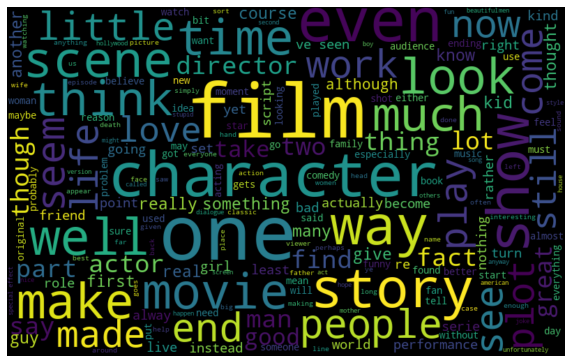

In [ ]:
# WordCloud of all reviews
all_words=' '.join([text for text in df['clean_review']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

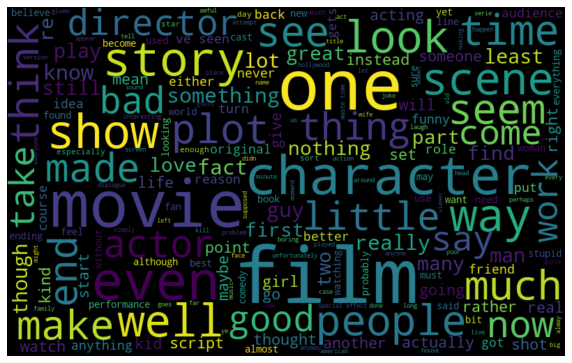

In [ ]:
# WordCloud of positive reviews
pos_words=' '.join([text for text in df['clean_review'][df['sentiment']==0]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(pos_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

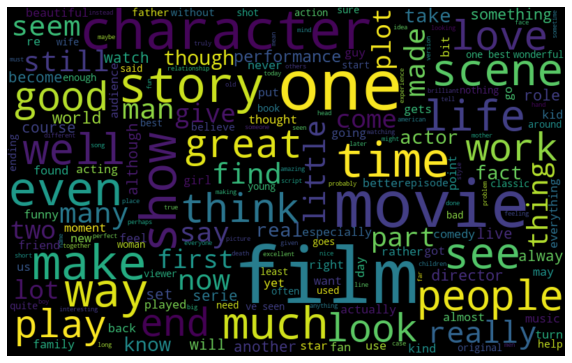

In [ ]:
# WordCloud of negative reviews
neg_words=' '.join([text for text in df['clean_review'][df['sentiment']==1]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neg_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

From the 3 pictures generated from the all reviews, positive reviews and negative reviews, we could find that there was little the wording difference among these 3 categories. Thus, it would not have further analysis on the individual words. 

**(c) Text Tokenization**

Text tokenization is the important step in the NLP. It is a way of separating a piece of text into smaller units called tokens. In this project, token was the word extracted from the clear review which has been implemented data cleaning. 2 types of tokenization were tried in this project. 

One was called tokenizer which just split the sentence into word. 

In [ ]:
def tokenizer(text):
  return text.split()

tokenizer('As a singer, she enjoys singing when she sing')

['As', 'a', 'singer,', 'she', 'enjoys', 'singing', 'when', 'she', 'sing']

Another one was tokenizer_stemmer which split the sentence and extra transfer the word into its stem, which group similar word into the same group.

In [5]:
porter = PorterStemmer()

def tokenizer_stemmer(text):
  return[porter.stem(word) for word in text.split()]

tokenizer_stemmer('As a singer, she enjoys singing when she sing')

['As', 'a', 'singer,', 'she', 'enjoy', 'sing', 'when', 'she', 'sing']

Since toknizer_stemmer would assist the further analysis, it was finally adopted. [4]

**3.2 Feature Engineering**

During this stage, the main task was to vectorize the review text. According to the research, compared with the CountVectorizer which only record the words’ counts, TF-IDF Vectorizer would accounts for the importance of word to the sentence and would be more helpful for the sentiment analysis.

Therefore, TF-IDF Vectorizer was used to transform the text into feature vector. 

In [6]:
tfidf = TfidfVectorizer(strip_accents=None,
                         lowercase=True,
                         preprocessor=None,  # Have applied preprocessor in Data Cleaning
                         tokenizer=tokenizer_stemmer,
                         use_idf=True,
                         norm='l2',
                         smooth_idf=True)

y = df.sentiment.values
X = tfidf.fit_transform(df.clean_review)

# 4. Method

The machine learning algorithms that I used in this project were Support Vector Machines and Logistic Regression. They were both covered in INT305 lectures.

**4.1 Support Vector Machines**

Support Vector Machines (SVM) is the supervised learning models. It is a linear classifier that widely used in the binary classification in sentiment analysis. It could be written as: 




**H={x:w·x+a=0}** where a is scalar, x stands for the sample points

w is the normal vector to the hyperplane.

When we train the data, usually 2 parallel hyperplanes would be used to separate 2 classes of data. The region bounded by 2 hyperplanes is called margin. Under the case that data is not linearly separable, hinge loss function would be used to obtain the objective function assisting the algorithm optimization. 

![](https://drive.google.com/uc?export=view&id=1ApreA1XXdwPMAr-0Nh4iOCKkv1qW1yjJ)

![](https://drive.google.com/uc?export=view&id=18Vi_0UjOM85jybTLj4arPCFZjb_kzsNk)

The hyper-parameter C here was used to determines the trade-off which is between ensure correctly classification and increasing the size of margin. To lower the error of the classifier on specific problem, kernel function is usually selected to suit the problem, where  stands for the transformed data points. 



![](https://drive.google.com/uc?export=view&id=16_tzZKjc9dTSNxoplW_Be0eEYMkUAzLy)

The widely used function are: Linear Kernel, Radial Basis Function, Polynomial Kernel and Sigmoid Kernel. 

**4.2 Logistic Regression**

Regression is one important application of machine learning. By giving model, it could be used to predict a numerical value on a continuous scale. When formulate the regression, regression function h(x;p) is chosen to fit the data. Cost function is chosen to optimize the model based on the loss function. Logistic regression is composed with the logistic regression function, logistic loss function and mean loss function.

![](https://drive.google.com/uc?export=view&id=1Y8YM7wI66f5UrCYPHsUOlns6eY3KOYz-)

![](https://drive.google.com/uc?export=view&id=1YrU3yL_KWnYtIy6gn7hUC0iiUbjdcslD)

Since its probabilities fits in range (0,1), it is usually used in binary classification.

**4.3 Application Method**

Scikit learn library was the main library used in the model training. 

Before training, learning curve and validation curve coming from sklearn.model_selection library were used. Learning curve was used to select the size of training samples which would not overfitting. After that, validation curve was used to predict the relationship between the parameter selection and accuracy. Then, according to the optimal split size obtained from learning curve, training set and testing set were split by train_test_split. 

During the training process, when assess the performance of model, cross_val_score was used. Cross validation could be used to find optimal subset and reduce overfitting by use k-fold CV, which split training set into k smaller sets as training data and use rest data as validation set to compute performance measure. [4] At the training stage, mean accuracy was used as the performance measure. 

When trained the SVM model, sklearn.svm library was used. 4 kernels (linear, poly, rbf and sigmoid) was set and compared. Then the model with the best performance would be further used to trained with k-folds with different numbers. The loss function used would be hinge loss function. 

When trained the Logistic Regression model, sklearn.linear_model library was used. Different verbose, penalty and max_iter settings would be tested and compared and then trained with k-folds with different numbers. 

After the model training, during the stage of model validation, confusion matrix, F1 score, accuracy, precision and recall were used to measure the performance of models. 


# 5. Experiments and Results

The experiments in this project are introduced in the following 2 parts, Support Vector Machines and Logistic Regression. They both follows the method written in Section 4: Method. 

**(a) Support Vector Machine**

**1. Learning Curve & Validation Curve**

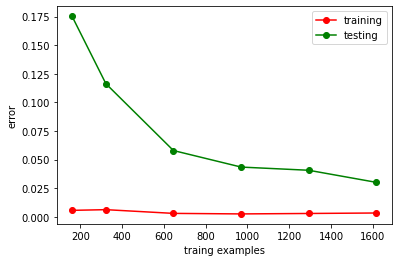

In [ ]:
# Obtain Learning Curve of Dataset
(X,y) = datasets.load_digits(return_X_y=True)
 
train_sizes,train_score,test_score = learning_curve(SVC(),X,y,train_sizes=[0.1,0.2,0.4,0.6,0.8,1],cv=10,scoring='accuracy')
train_error =  1- np.mean(train_score,axis=1)
test_error = 1- np.mean(test_score,axis=1)
plt.plot(train_sizes,train_error,'o-',color = 'r',label = 'training')
plt.plot(train_sizes,test_error,'o-',color = 'g',label = 'testing')
plt.legend(loc='best')
plt.xlabel('traing examples')
plt.ylabel('error')
plt.show()

From the learning curve, we could find that the training size could be as large as possible to reduce the testing error and not worry about the overfitting. 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: C <= 0

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: C <= 0

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: C <= 0

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: C <= 0

  FitFai

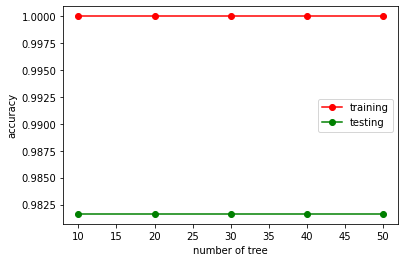

In [ ]:
# Obtain Validation Curve of Dataset on differnt hyper-parameter range
(X,y) = datasets.load_digits(return_X_y=True)

param_range = [0,10,20,30,40,50]
train_score,test_score = validation_curve(SVC(),X,y,param_name='C',param_range=param_range,cv=10,scoring='accuracy')
train_score =  np.mean(train_score,axis=1)
test_score = np.mean(test_score,axis=1)
plt.plot(param_range,train_score,'o-',color = 'r',label = 'training')
plt.plot(param_range,test_score,'o-',color = 'g',label = 'testing')
plt.legend(loc='best')
plt.xlabel('number of tree')
plt.ylabel('accuracy')
plt.show()

Validation curve is used to assessed accuracy under different hyper-parameters settings. It shows there was no obvious difference of different hyper-parameter selection. 

**2. Split Training and Testing Set**

According to the results obtained from learning curve, test size was set as 0.1. Random state was set as 1 to get the same result every training. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.1, shuffle=False)


**3. Kernel Selection**

With the original setting of SVC(), 4 kernels were evaluated with their accuracy using cross-validation. 

In [ ]:
# Linear Kernel
svc=SVC(kernel="linear",probability=True)
scores=scores=cross_val_score(svc,X_train, y_train,scoring="accuracy",n_jobs=-1,cv=5) ## table record 5-16
print('Cross-validation mean accuracy {0:.2f}%'.format(np.mean(scores)*100))

Cross-validation mean accuracy 94.37%


In [ ]:
# Polynomial Kernel
svc=SVC(kernel="poly",probability=True)
scores=scores=cross_val_score(svc,X_train, y_train,scoring="accuracy",n_jobs=-1,cv=5) ## table record 5-16
print('Cross-validation mean accuracy {0:.2f}%'.format(np.mean(scores)*100))

Cross-validation mean accuracy 96.29%


In [ ]:
# RBF Kernel
svc=SVC(kernel="rbf",probability=True)
scores=scores=cross_val_score(svc,X_train, y_train,scoring="accuracy",n_jobs=-1,cv=5) ## table record 5-16
print('Cross-validation mean accuracy {0:.2f}%'.format(np.mean(scores)*100))

Cross-validation mean accuracy 96.60%


In [ ]:
# Sigmoid Kernel
svc=SVC(kernel="sigmoid",probability=True)
scores=scores=cross_val_score(svc,X_train, y_train,scoring="accuracy",n_jobs=-1,cv=5) ## table record 5-16
print('Cross-validation mean accuracy {0:.2f}%'.format(np.mean(scores)*100))

Cross-validation mean accuracy 88.50%


Based on the results, we could find that RBF kernel performed the best.

**4. K-Fold cross validation**

During the cross validation, different folds were tested.

In [ ]:
%%time
# Test different folds
cv=[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
for m in range(len(cv)):
  print(cv[m])
  svc = SVC(C=20,kernel="rbf",probability=True)
  scores=cross_val_score(svc,X_train, y_train,scoring="accuracy",n_jobs=-1,cv=cv[m]) 
  print('Cross-validation mean accuracy {0:.2f}%'.format(np.mean(scores)*100))



5
Cross-validation mean accuracy 96.72%
6
Cross-validation mean accuracy 97.90%
7
Cross-validation mean accuracy 97.53%
8
Cross-validation mean accuracy 97.96%
9
Cross-validation mean accuracy 97.96%
10
Cross-validation mean accuracy 97.96%
11
Cross-validation mean accuracy 98.45%
12
Cross-validation mean accuracy 98.27%
13
Cross-validation mean accuracy 98.58%
14
Cross-validation mean accuracy 98.70%
15
Cross-validation mean accuracy 98.70%
16
Cross-validation mean accuracy 98.70%
17
Cross-validation mean accuracy 98.89%
18
Cross-validation mean accuracy 98.95%
19
Cross-validation mean accuracy 98.89%
20
Cross-validation mean accuracy 99.01%
21
Cross-validation mean accuracy 98.95%
22
Cross-validation mean accuracy 99.01%
23
Cross-validation mean accuracy 98.95%
24
Cross-validation mean accuracy 98.95%
25
Cross-validation mean accuracy 99.01%
26
Cross-validation mean accuracy 98.89%
27
Cross-validation mean accuracy 99.07%
28
Cross-validation mean accuracy 99.13%
29
Cross-validation m

According to the results, 30 folds achieved the best result. 

In [ ]:
%%time
svc = SVC(C=20,kernel="rbf",probability=True)
scores=cross_val_score(svc,X_train, y_train,scoring="accuracy",n_jobs=-1,cv=30)
print('Cross-validation mean accuracy {0:.2f}%'.format(np.mean(scores)*100))

Cross-validation mean accuracy 99.13%
CPU times: user 140 ms, sys: 15.1 ms, total: 156 ms
Wall time: 9.74 s


**5. Model Evaluation**

During the model evaluation, the test set was tested with the optimal SVM model. 

In [ ]:
# fit the SVC model based on the given training data
prob = svc.fit(X_train, y_train).predict_proba(X_test)

# perform classification and prediction on samples in x_test
y_pred_svm = svc.predict(X_test)
svc.score(X_test, y_test)

0.9666666666666667

Then confusion matrix was constructed to test the performance. 

In [ ]:
# Confusion Matrix Plotting function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred_svm, labels=[1,0]))


[[19  0]
 [ 0 16]]


Confusion matrix, without normalization
[[19  0]
 [ 0 16]]


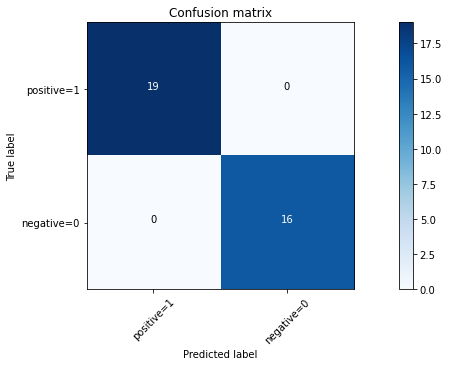

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_svm, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure(figsize=(13,5))
plot_confusion_matrix(cnf_matrix, classes=['positive=1','negative=0'],normalize= False,  title='Confusion matrix')


F1-score, recall and precision matrices were also used to test the performance of the optimal SVM model for this dataset. 

In [ ]:
#f1 score
metrics.f1_score(y_test,y_pred_svm, average='weighted') 

0.9662676817088581

In [ ]:
# Recall
metrics.recall_score(y_test, y_pred_svm, average='micro')

0.9666666666666667

In [ ]:
# Precision
metrics.precision_score(y_test,y_pred_svm, average='micro')  

0.9666666666666667

**(b) Logistic Regression**

**1. Learning Curve**

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


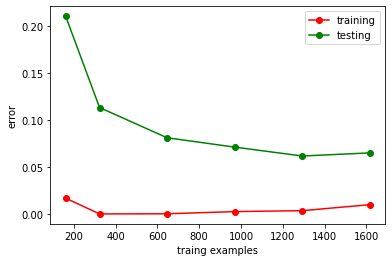

In [ ]:
# Obtain Learning Curve of Dataset
(X,y) = datasets.load_digits(return_X_y=True)
 
train_sizes,train_score,test_score = learning_curve(LogisticRegressionCV(),X,y,train_sizes=[0.1,0.2,0.4,0.6,0.8,1],cv=10,scoring='accuracy')
train_error =  1- np.mean(train_score,axis=1)
test_error = 1- np.mean(test_score,axis=1)
plt.plot(train_sizes,train_error,'o-',color = 'r',label = 'training')
plt.plot(train_sizes,test_error,'o-',color = 'g',label = 'testing')
plt.legend(loc='best')
plt.xlabel('traing examples')
plt.ylabel('error')
plt.show()

From the learning curve of logistic regression classifier, we could also find that the training size could be as large as possible to reduce the testing error and not worry about the overfitting. 


**2. Split Training and Testing Set**

According to the results obtained from learning curve, test size was also set as 0.1. Random state was set as 1 to get the same result every training.

In [7]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=1, test_size=0.1, shuffle=False)

**3. Different verbose**

Different verbose setting was set to find the parameter of best performance. 

In [ ]:
%%time
# Test different verbose
verbose=[1,2,3]
for m in range(len(verbose)):
  print(verbose[m])
  clf = LogisticRegressionCV(scoring="accuracy",
                           n_jobs=-1,
                           cv=5,
                           random_state=0,
                           verbose=verbose[m],
                           penalty="l2",
                           max_iter=300)
  scores=cross_val_score(clf,X_train1, y_train1,scoring="accuracy",n_jobs=-1,cv=5) 
  print('Cross-validation mean accuracy {0:.2f}%'.format(np.mean(scores)*100))



1
Cross-validation mean accuracy 92.77%
2
Cross-validation mean accuracy 92.77%
3
Cross-validation mean accuracy 92.77%
4


**4. Different max_iter**

Different max_iter setting was set to find the optimal parameter.

In [ ]:
%%time
# Test different max_iter
max_iter=[100,200,300,400,500]
for m in range(len(max_iter)):
  print(max_iter[m])
  clf = LogisticRegressionCV(scoring="accuracy",
                           n_jobs=-1,
                           cv=5,
                           random_state=0,
                           verbose=3,
                           penalty="l2",
                           max_iter=max_iter[m])
  scores=cross_val_score(clf,X_train1, y_train1,scoring="accuracy",n_jobs=-1,cv=5) 
  print('Cross-validation mean accuracy {0:.2f}%'.format(np.mean(scores)*100))



100
Cross-validation mean accuracy 90.02%
200
Cross-validation mean accuracy 90.02%
300


**5. K-Fold cross validation**

During the cross validation, different folds were tested.

In [ ]:
%%time
# Test different folds
cv=[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for m in range(len(cv)):
  print(cv[m])
  clf = LogisticRegressionCV(scoring="accuracy",
                           n_jobs=-1,
                           cv=5,
                           random_state=0,
                           verbose=3,
                           penalty="l2",
                           max_iter=300)
  scores=cross_val_score(clf,X_train1, y_train1,scoring="accuracy",n_jobs=-1,cv=cv[m]) 
  print('Cross-validation mean accuracy {0:.2f}%'.format(np.mean(scores)*100))



5
Cross-validation mean accuracy 90.02%
6
Cross-validation mean accuracy 90.03%
7


According to the results, 20 folds achieved the best result. 

In [8]:
clf = LogisticRegressionCV(scoring="accuracy",
                           n_jobs=-1,
                           cv=5,
                           random_state=0,
                           verbose=3,
                           penalty="l2",
                           max_iter=300)

In [ ]:
%%time
scores=cross_val_score(clf,X_train1, y_train1,scoring="accuracy",n_jobs=-1,cv=5) 
print('Cross-validation mean accuracy {0:.2f}%'.format(np.mean(scores)*100))

**6. Model Evaluation**

During the model evaluation, the test set was tested with the optimal Logistic Regression model. 

In [9]:
# fit the clf model based on the given training data
prob = clf.fit(X_train1, y_train1).predict_proba(X_test1)

# perform classification and prediction on samples in x_test
y_pred_clf = clf.predict(X_test1)
clf.score(X_test1, y_test1)

# Output is:
#[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
# [Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.7s finished
# 0.9333333333333333


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.5min finished


0.9008

Then confusion matrix was constructed to test the performance. 

In [10]:
# Confusion Matrix Plotting function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test1, y_pred_clf, labels=[1,0]))


[[2286  246]
 [ 250 2218]]


Confusion matrix, without normalization
[[2286  246]
 [ 250 2218]]


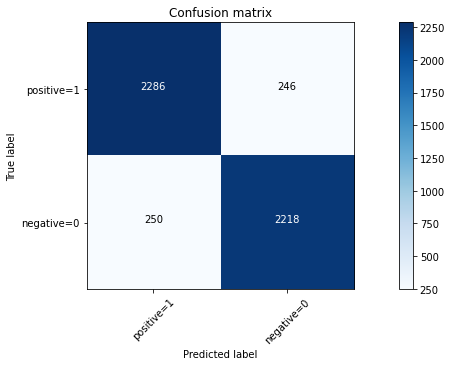

In [11]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test1, y_pred_clf, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure(figsize=(13,5))
plot_confusion_matrix(cnf_matrix, classes=['positive=1','negative=0'],normalize= False,  title='Confusion matrix')


F1-score, recall and precision matrices were also used to test the performance of the optimal SVM model for this dataset. 

In [12]:
#f1 score - output is 0.9333333
metrics.f1_score(y_test1,y_pred_clf, average='weighted') 

0.9007989205043364

In [13]:
#Recall - output is 0.93363333
metrics.recall_score(y_test1,y_pred_clf, average='micro') 

0.9008

In [14]:
#Precision - output is 0.9333333
metrics.precision_score(y_test1,y_pred_clf, average='micro') 

0.9008

# 6. Conclusions and Future Works

To conclude, in this project, I learned current development and several approaches used in sentiment analysis from conducting sentiment analysis on movie reviews. According to the research of related work, machine learning is the important method utilized in sentiment analysis and mainly used in polarity classification. Before the model training, preprocessing was implemented by text cleaning, text exploration and text tokenization. In addition, those review texts were converted into TD-IDF vectors that useful for the future model training. 

During the model training, Support Vector Machines and Logistic Regression were compared based on their performance measured by accuracy, precision, recall and confusion matrix. During the model optimization, several approaches were adopted to improve the performance and avoid overfitting, such as learning curve, validation curve and cross-validation. Based on the results, we could find that Support Vector Machine is better than the Logistic Regression not only on the performance, but also on the time of training. The possible reason of it may because the kernel function (Radial Basis Function) used by Support Vector Machine shows the better performance on the classification especially on dealing with the binary classification on text. In addition, explored from the experiments, we could find that the folds of the cross validation has the largest impact on the final performance of the model. 

The highest classification accuracy achieved 96.7 on the movie review dataset, which was surprised and out of my expectation. If there are more time and computational resources, I would like to improve these things. Firstly, I would like to use GridSearch to find the optimal parameter used by the model on this dataset. Due to limited computational ability of my laptop, I couldn’t be achieved this time. Secondly, I would produce overall comparison of two algorithms in more perspectives. Because of the time limits, although the results of two models’ performance have been demonstrated from several perspectives, there were no visualized comparison of two algorithms. In the future, I would like to learn more techniques of data visualization using Python to improve the demonstration of training results. In addition, I also like to challenge more algorithms on sentiment analysis if time permit. Except the linear classifier, neural network is also used in the sentiment analysis. The performance of the neural network on sentiment analysis is worth to be well evaluated in the future. 

# 7. Bibliography

There are 3 types of references used in this project. 

**7.1 Paper Used in Related Work**

[1] Maas, Andrew, et al, Learning word vectors for sentiment analysis, Proceedings of the 49th annual meeting of the association for computational linguistics: Human language technologies. 2011.

[2] Medhat W, Hassan A, Korashy H. Sentiment analysis algorithms and applications: A survey. Ain Shams engineering journal, 2014.

[3] Pang B, Lee L, Vaithyanathan S. Thumbs up? Sentiment classification using machine learning techniques[J]. arXiv preprint cs/0205070, 2002.

[4] Ramadhan W P, Novianty S A, Setianingsih S C. Sentiment analysis using multinomial logistic regression[C]//2017 International Conference on Control, Electronics, Renewable Energy and Communications (ICCREC). IEEE, 2017.

**7.2 Reference Code**

This project referred to the code in these websites. Every code reused in this project was well-commented. 
1. Text Exploration: WordCloud Visualization
https://github.com/TracyRenee61/Twitter-Sentiment-Analysis/blob/master/Analytics%20Twitter%20Sentiment%20Analysis%20-%20Logistic%20Reg.ipynb
2. Data Cleaning and Model Evaluation: Performing Sentiment Analysis on Movie Reviews
https://towardsdatascience.com/imdb-reviews-or-8143fe57c825  

**7.3 Python Libraries**

Sckit-learn was the main libraries used in this project to support multiple process in machine learning such as model training and validation. In addition, basic libraries were also used to assist implementation such as on data frame and visualization. They were: os, numpy, seaborn, pandas, re, nltk.stem.porter, wordcloud and itertools. 